# 1- Chuẩn bị dữ liệu



## 1.1 - Tập dữ liệu
* Tên tập dữ liệu: ***Air Pollution Forecasting***
* Link:  [https://www.kaggle.com/datasets/rupakroy/lstm-datasets-multivariate-univariate?select=LSTM-Multivariate_pollution.csv](https://www.kaggle.com/datasets/rupakroy/lstm-datasets-multivariate-univariate?select=LSTM-Multivariate_pollution.csv)
* Bộ dữ liệu báo cáo về thời tiết và mức độ ô nhiễm ở Beijing(China)
* Gồm các thuộc tính:
  * date: thời gian ghi nhận
  * pollution: mức độ ô nhiễm
  * dew: điểm sương
  * temp: nhiệt độ
  * press: áp suất
  * wnd_dr: hướng gió kết hợp
  * wnd_spd	: tốc độ gió tích lũy
  * snow: số giờ tuyết tích lũy
  * rain: Số giờ mưa tích lũy
* Dự đoán mức độ ô nhiễm không khí trong tương lai

In [1]:
#https://drive.google.com/file/d/1Gf1x-ukZrXaxi23Wc1NsfNkY0-4935XB/view?usp=sharing
%%shell
pip -q install --upgrade --no-cache-dir gdown
gdown --q 1ValG0X0GsT5CgVWEQro3q8GBzfDstpft

##1.2- Thư viện

In [4]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 589.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
from keras.layers import TimeDistributed

from sklearn.linear_model import LinearRegression

#2- Khám phá dữ liệu

##2.1- Đọc dữ liệu từ file csv


In [6]:
df = pd.read_csv("/content/LSTM-Multivariate_pollution.csv")
df.head(10)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
5,2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
7,2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
8,2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0
9,2010-01-02 09:00:00,132.0,-7,-5.0,1025.0,SE,14.30,0,0


##2.2- Thông tin cơ bản của tập dữ liệu

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


##2.3- Kiểm tra giá trị null

In [8]:
df.isnull().any()

,0
date,False
pollution,False
dew,False
temp,False
press,False
wnd_dir,False
wnd_spd,False
snow,False
rain,False


##2.4- Thống kê của các cột dữ liệu

In [9]:
df.describe()

,pollution,dew,temp,press,wnd_spd,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


#3- Xử lý dữ liệu

##3.1- Tạo dữ liệu theo ngày

In [10]:
# Trích xuất ngày từ cột 'date'
df['date'] = df['date'].str.split(' ').str[0]

# Tính toán dữ liệu theo từng ngày
df_perday = df.groupby('date').agg({'pollution': 'mean'})
df_perday = df_perday.reset_index(drop=True)
df_perday

,pollution
0,145.958333
1,78.833333
2,31.333333
3,42.458333
4,56.416667
...,...
1820,238.666667
1821,197.375000
1822,159.000000
1823,46.083333


##3.2- Chia tập train test

In [11]:
def data_to_frame(x, group=4):
  N = x.shape[0]
  x_pad = np.concatenate((x, np.zeros(group)), axis=0)
  x_ext = np.tile(x_pad, group - 1)
  x_ext = np.concatenate( (x_ext, x) , axis =0)
  Y = np.reshape(x_ext, (-1, N + group -1)).T
  Y = Y[group-1:-group, ::-1]
  data = Y[:, :group-1]
  target = Y[:, group-1]
  return (data, target)


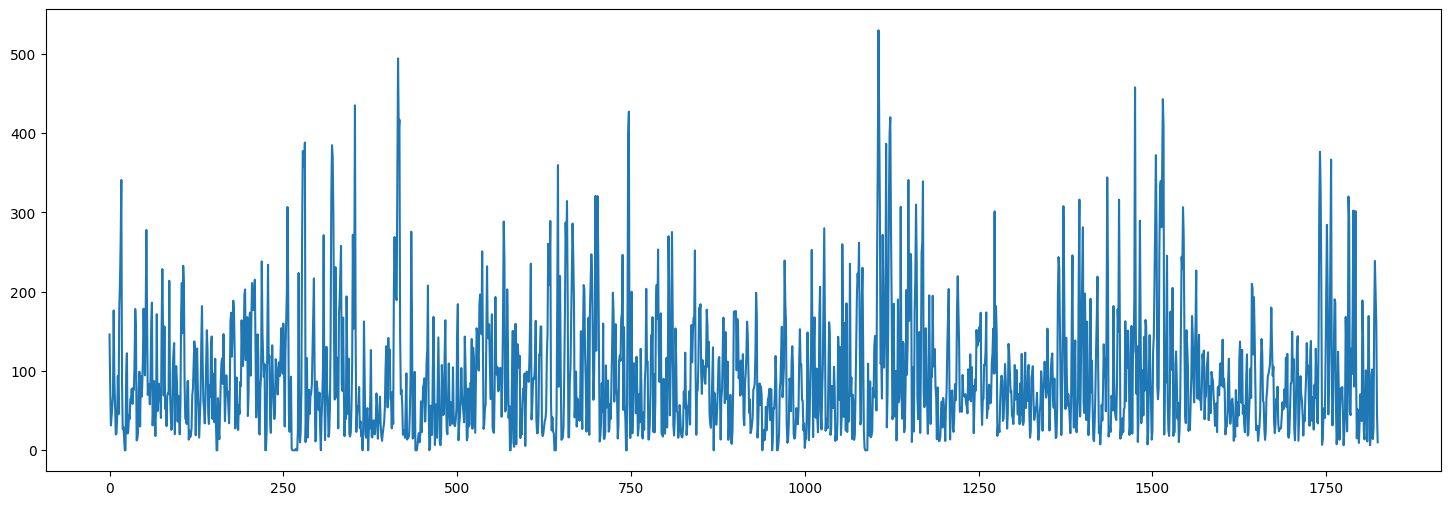

(1460,) (365,)
num of days total: 1825
num of days in train:  1447
num of days in test:  352


In [12]:
df_perday = df_perday.values.flatten()

ndays = df_perday.shape[0]
x = np.arange(ndays)
plt.figure(figsize=(18,6))
plt.plot(x, df_perday)
plt.show()

#chia data
ndays_test = int(ndays*0.2) # 20% test
train_data = df_perday[:-ndays_test]
test_data =  df_perday[ndays-ndays_test:]
print(train_data.shape,test_data.shape)
group = 13

X_train, Y_train = data_to_frame(train_data, group=group)

#test data
X_test, Y_test = data_to_frame(test_data, group=group)

X_MAX = X_train.max()
X_train = X_train/X_MAX
X_test = X_test/X_MAX
Y_train = Y_train/X_MAX
Y_test = Y_test/X_MAX

print('num of days total:', ndays)
print('num of days in train: ', X_train.shape[0])
print('num of days in test: ', X_test.shape[0])


In [13]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1447, 12) (1447,)
(352, 12) (352,)


In [14]:
ALL = X_train.shape[1]
T = 6; F = 2
X_train = X_train.reshape(-1, T, F)
X_test = X_test.reshape(-1, T, F)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1447, 6, 2) (1447,)
(352, 6, 2) (352,)


##3.3-Tạo mô hình huấn luyện

In [15]:
model = Sequential()
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(3, return_sequences=False))
model.add(Dense(1))

##3.4- Huấn luyện mô hình

In [16]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])
model.fit(X_train, Y_train, batch_size=20, epochs=80, verbose=1)
model.summary()

Epoch 1/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 2/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 3/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 4/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 5/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 6/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 7/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 8/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 9/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 10/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 11/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 64)          │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 3)              │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,918 (210.62 KB)

 Trainable params: 17,972 (70.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,946 (140.42 KB)

##3.5- Trực quan hóa mô hình dự đoán

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


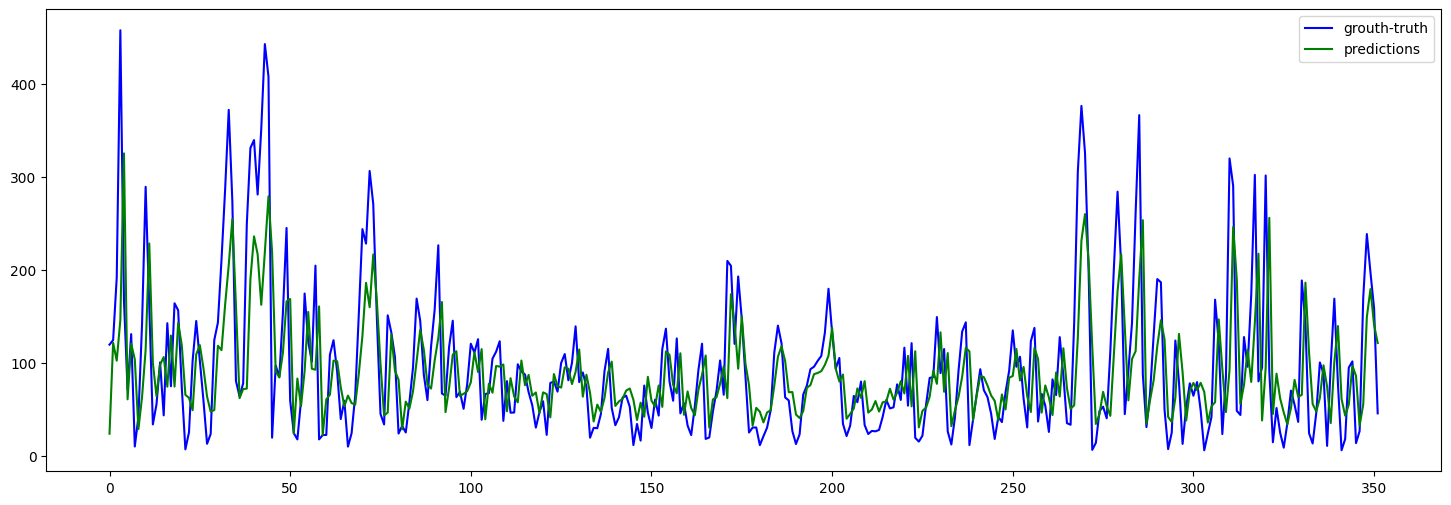

In [17]:

# Dự đoán kết quả
y_pred = model.predict(X_test)
y_pred *= X_MAX

plt.figure(figsize=(18,6))
plt.plot(Y_test*X_MAX, c='b', label='grouth-truth')
plt.plot(y_pred, c='g', label='predictions')

plt.legend()
plt.show()

##3.6- Đánh giá mô hình

In [18]:
loss, mse = model.evaluate(X_test, Y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_squared_error: 0.0181  


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Tính toán các độ đo
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
mape = mean_absolute_percentage_error(Y_test, y_pred) * 100
r2 = r2_score(Y_test, y_pred)

# In kết quả
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-squared:", r2)

MAE: 90.21514242794494
RMSE: 102.61340284129778
MAPE: 83826.9009005323
R-squared: -449267.9281387136


In [20]:
#tạo dict lưu trữ thông tin các độ đo
model1_metrics = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape,'R-squared': r2,'MSE': mse}


#4- LinearRegression

##4.1- Chia tập train test

In [21]:
ndays = df_perday.shape[0]

#split data
ndays_test = int(ndays*0.2) # use 20% of days for testing
train_data = df_perday[:-ndays_test]
test_data =  df_perday[ndays-ndays_test:]
print(train_data.shape,test_data.shape)
group = 13

X_train, Y_train = data_to_frame(train_data, group=group)

#test data
X_test, Y_test = data_to_frame(test_data, group=group)

#normalize data
X_MAX = X_train.max()
X_train = X_train/X_MAX
X_test = X_test/X_MAX
Y_train = Y_train/X_MAX
Y_test = Y_test/X_MAX


(1460,) (365,)


##4.2- Tạo mô hình huấn luyện

In [22]:
model2=LinearRegression()
model2.fit(X_train,Y_train)

LinearRegression()

##4.3- Trực quan hóa mô hình dự đoán

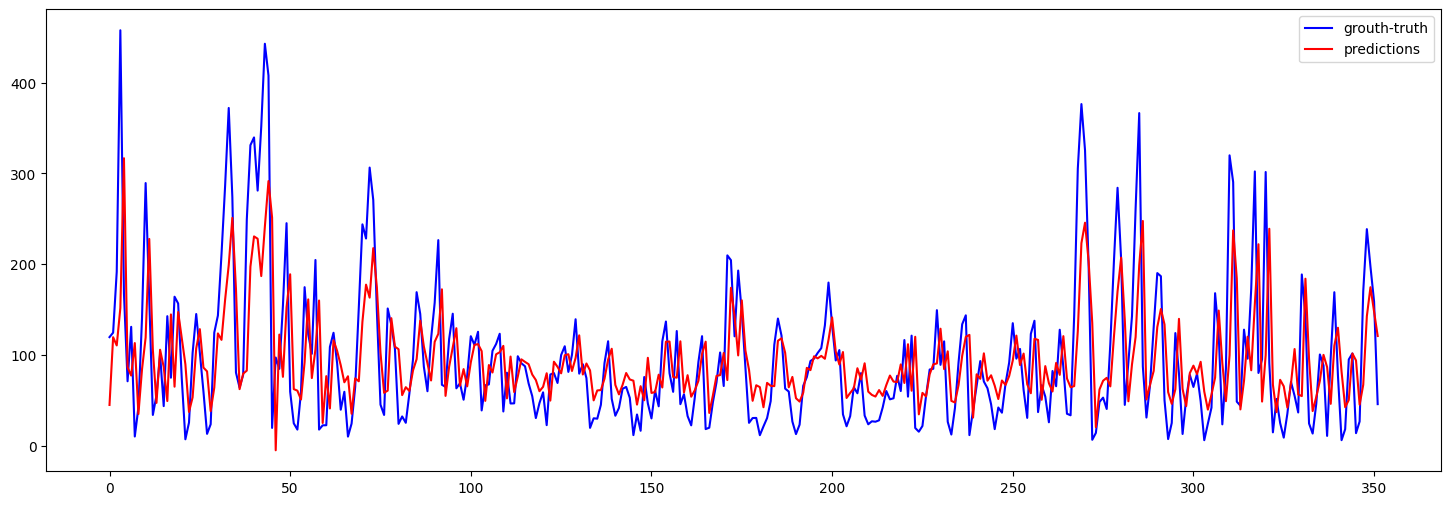

In [23]:
# Dự đoán kết quả
y_pred2 = model2.predict(X_test)
y_pred2 *= X_MAX
plt.figure(figsize=(18,6))
plt.plot(Y_test*X_MAX, c='b', label='grouth-truth')
plt.plot(y_pred2, c='r', label='predictions')

plt.legend()
plt.show()

##4.4- Đánh giá mô hình

In [24]:
# Tính toán các độ đo
mae = mean_absolute_error(Y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred2))
mape = mean_absolute_percentage_error(Y_test, y_pred2) * 100
r2 = r2_score(Y_test, y_pred2)
mse = mean_squared_error(Y_test, y_pred2)
# In kết quả
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-squared:", r2)

MAE: 95.24939631926286
RMSE: 106.47768869766222
MAPE: 91402.32545353982
R-squared: -483742.82527153054


In [25]:
#tạo dict lưu trữ thông tin các độ đo
model2_metrics = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape,'R-squared': r2,'MSE': mse}


#5. Kết luận

In [26]:
#so sánh 2 mô hình
df = pd.DataFrame([model1_metrics, model2_metrics], index=['Model 1', 'Model 2'])
df

,MAE,RMSE,MAPE,R-squared,MSE
Model 1,90.215142,102.613403,83826.900901,-449267.928139,0.014549
Model 2,95.249396,106.477689,91402.325454,-483742.825272,11337.498190


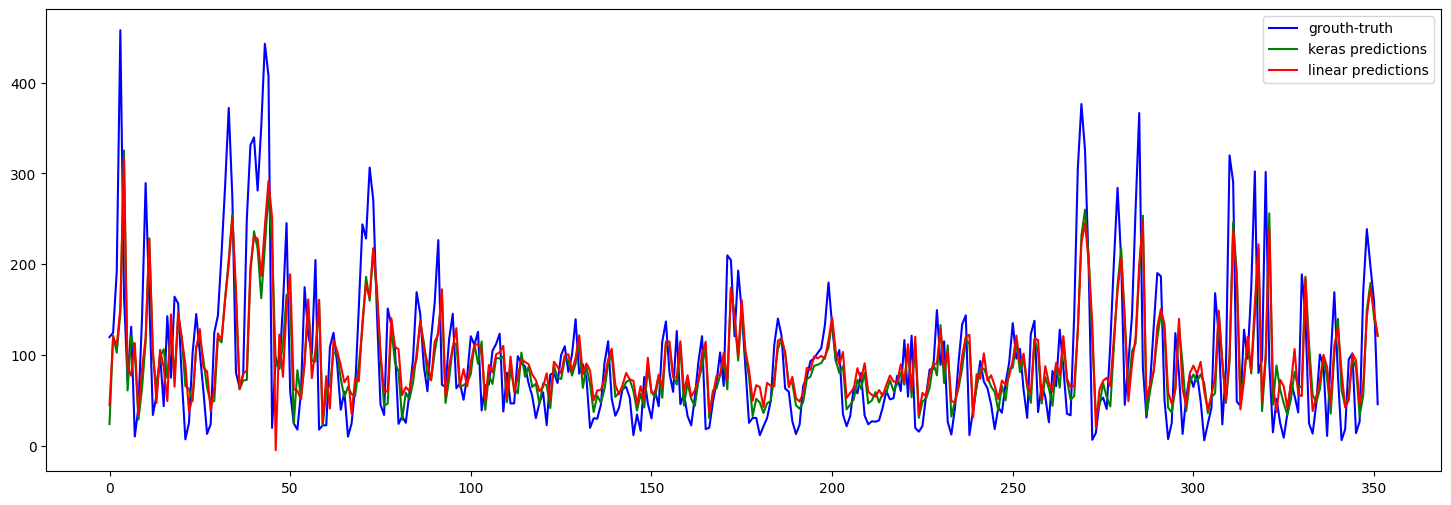

In [27]:
plt.figure(figsize=(18,6))
plt.plot(Y_test*X_MAX, c='b', label='grouth-truth')
plt.plot(y_pred, c='g', label='keras predictions')
plt.plot(y_pred2, c='r', label='linear predictions')
plt.legend()
plt.show()



*   So sánh keras preditions và linear predictions thì cả hai mô hình gần như tương đồng với nhau
*   So sánh với grouth-truth thì có sự sai lệch

